In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from gibbs_sampling.gibbs_samplers import *
from gibbs_sampling.initialization import *
from gibbs_sampling.sampling_functions import *

In [5]:
import pandas as pd
senate_data = pd.read_csv('votes.csv')
vote_data = senate_data.values
n1,n2 = vote_data.shape
for i in range(n1):
    for j in range(n2):
        if vote_data[i,j] == -1:
            vote_data[i,j] = 0.5
u,d,vt = np.linalg.svd(vote_data.T@vote_data)
v=vt.T
new_vote_data = vote_data@u[:,:2]


## Here we do the Beta-Bernoulli Mixture model

[-38548.54112305 -18833.17653092 -17993.04966279 -17946.03623298
 -17991.27163521 -17908.55384419 -17962.62991052 -17991.82099598
 -17936.75170525 -17949.65552346 -17952.68648957 -17932.43879593
 -17966.76113353 -17977.84862612 -17950.51809113 -17957.7845368
 -17953.25722217 -17953.82794328 -17946.5889078  -17994.63375828
 -17961.01037593 -17950.79602107 -17950.8228949  -17948.07984881
 -17987.75953357 -17949.66082777 -17953.21186334 -17978.22630176
 -17940.35414864 -17994.55150745 -17958.00133089 -18008.07173572
 -17947.19658918 -17991.5277911  -18013.28035876 -17977.64741116
 -18026.66890412 -18000.86994291 -17999.40578564 -18018.32599113
 -17927.53085687 -17940.33514568 -17993.81601807 -17956.45897259
 -17962.431536   -17980.83745327 -17965.66208594 -17965.24655455
 -18001.2691533  -17992.58195114 -17942.04552013 -17950.47812995
 -17951.24736286 -17933.41817489 -18005.63145921 -17974.65345988
 -17969.95654212 -17967.45584255 -17913.1616889  -17914.23772109
 -18002.73526217 -17992.53

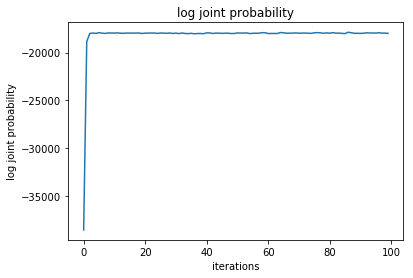

In [20]:
results_i = gibbs_sampler_ber(vote_data, 2, 0.5*np.ones(2),(0.5*np.ones(n2),0.5*np.ones(n2)),T=100,plot=True)

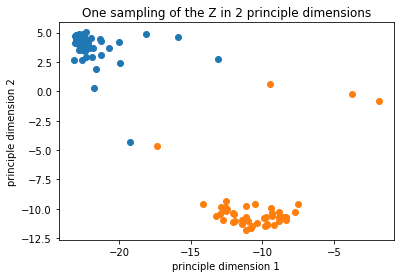

In [21]:
K=2
for k in range(K):
    plt.plot(new_vote_data[:,0][results_i['z']==k],new_vote_data[:,1][results_i['z']==k],'o',label=str(k))

    
plt.title("One sampling of the Z in 2 principle dimensions")
plt.xlabel('principle dimension 1')
plt.ylabel('principle dimension 2')
plt.show()

In [22]:
#%debug
gibbs_n = 1000
clusters_n = 2
z_sampled = np.zeros((gibbs_n,n1))
theta_sampled = np.zeros((gibbs_n,clusters_n))
beta_ber_sampled = np.zeros((gibbs_n,clusters_n,n2))
sampled_params = {'z':z_sampled,
                  'theta':theta_sampled,
                  'beta_ber':beta_ber_sampled}
i = 0
while i != gibbs_n:
    try:
        results_i = gibbs_sampler_ber(vote_data, 2, 0.5*np.ones(2),
                                (0.5*np.ones(n2),0.5*np.ones(n2)),T=10,plot=False,full=True)
        #results_i = gibbs_sampler_ber(vote_data, clusters_n, np.ones(clusters_n),
                                     #(np.zeros(n2),np.ones(n2)),(h_ig1,h_ig2),T=10)
        sampled_params['z'][i,:] = results_i['z'][:,-1]
        sampled_params['theta'][i,:] = results_i['theta'][:,-1]
        sampled_params['beta_ber'][i,:,:] = results_i['beta_ber'][:,:,-1]
        i+=1
    except ValueError:
        pass
        

/Users/donghanhe/Desktop/Columbia Program/6701 Graphical Models/Graphical Models - David Blei/6701-Foundations-of-Graphical-Models/HW1/gibbs_sampling/sampling_functions.py:99: RuntimeWarning: invalid value encountered in true_divide
  prob_norm = prob / np.sum(prob, axis=1).reshape((n, 1))


Below is the posterior for the Bernoulli's mean.

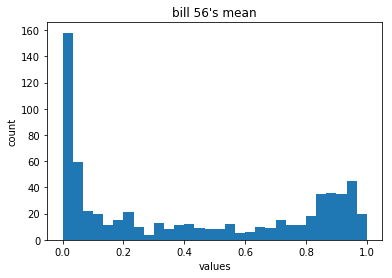

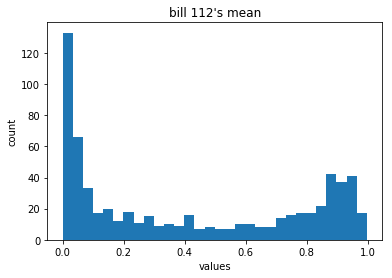

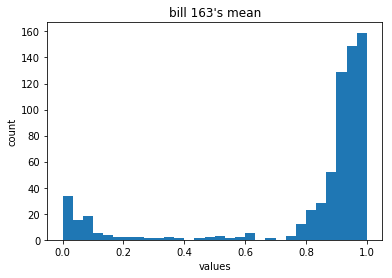

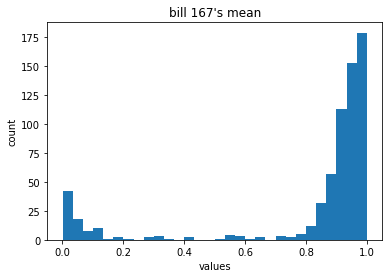

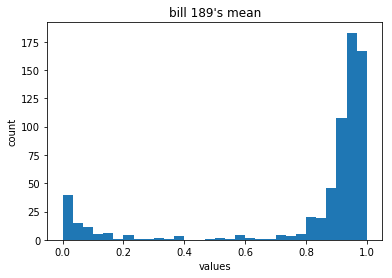

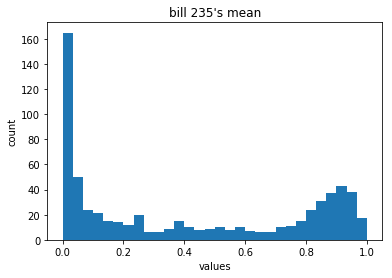

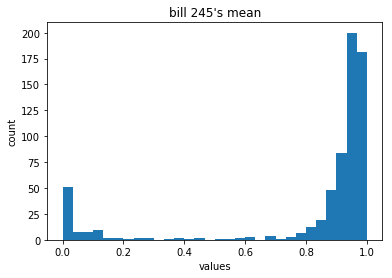

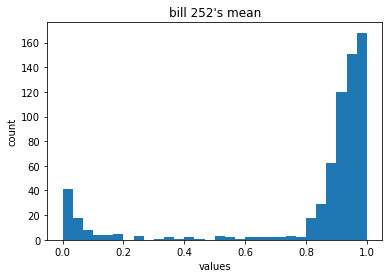

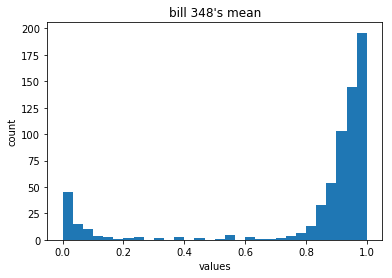

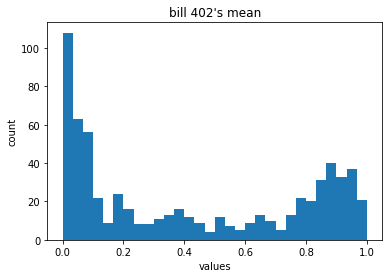

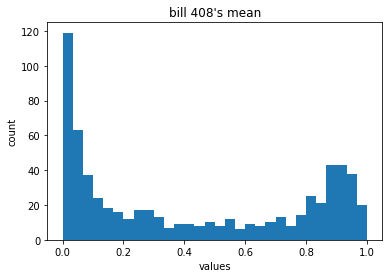

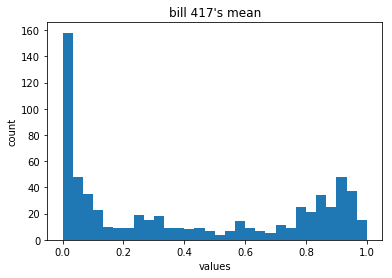

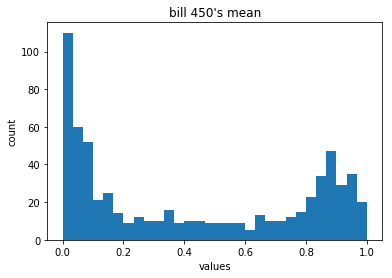

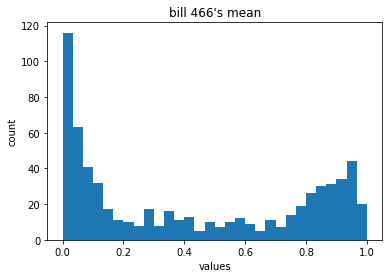

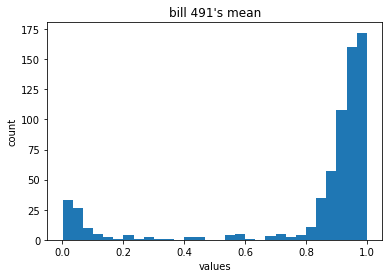

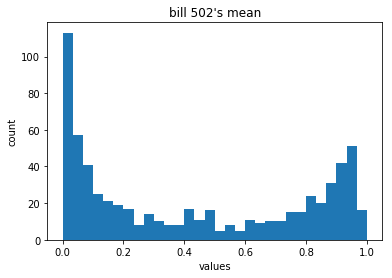

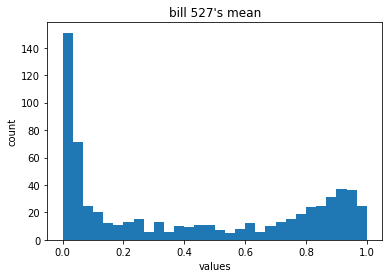

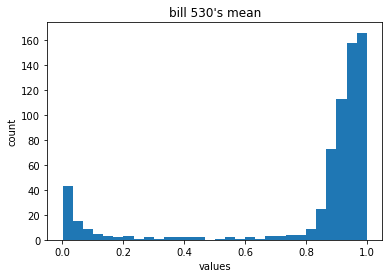

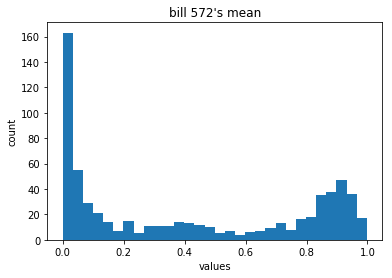

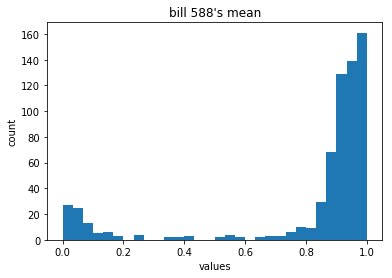

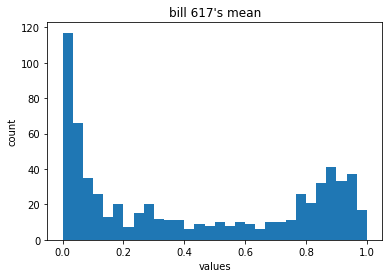

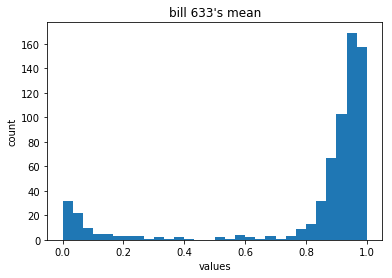

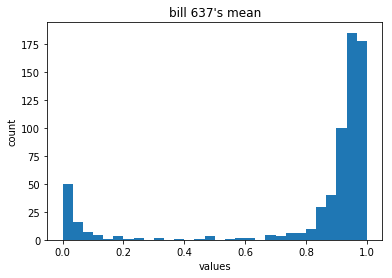

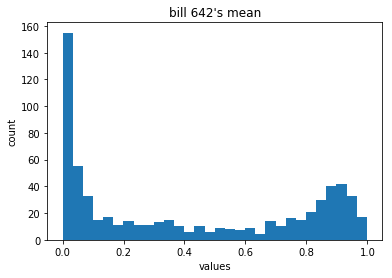

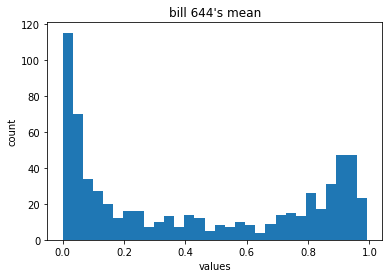

In [23]:
for i in range(n2):
    if st.uniform.rvs()<0.05:
        plt.hist(sampled_params['beta_ber'][i,0,:],bins=30)
        plt.title('bill '+str(i)+"'s mean")
        plt.ylabel('count')
        plt.xlabel('values')
        plt.show()

## Below we do the Gaussian Mixture model

In [25]:
n2

657

[-142502.62634263 -138918.63854948 -138622.66054963 -138620.84261128
 -138626.28321699 -138716.86989296 -138641.94959829 -138650.63641038
 -138636.09050249 -138652.63128643 -138637.71042123 -138655.01701617
 -138629.11268804 -138631.12942382 -138606.93842909 -138650.70802691
 -138629.64198556 -138703.86185353 -138675.2529742  -138667.30647914
 -138641.37233734 -138671.04706407 -138642.4962186  -138663.78614131
 -138634.63348041 -138618.14460463 -138627.02124792 -138719.29704758
 -138618.94140581 -138623.78919407 -138681.70050119 -138693.16623368
 -138652.861986   -138654.99854901 -138645.0789206  -138652.76735523
 -138652.97661412 -138655.35560196 -138606.04621795 -138637.20058676
 -138631.11428085 -138691.39845545 -138658.1771123  -138670.57571393
 -138650.66464588 -138663.26972451 -138646.37382137 -138641.2974092
 -138648.89505826 -138631.14531268 -138696.67697594 -138669.06787855
 -138639.03645217 -138605.28373122 -138694.20384043 -138658.13202337
 -138627.87617455 -138667.63256732 

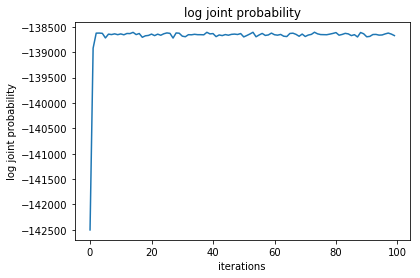

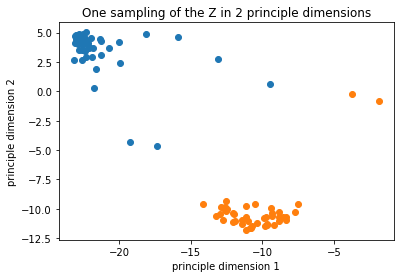

In [30]:
results_i = gibbs_sampler_mn(vote_data, 2, np.ones(2),(np.zeros(n2)-10,np.ones(n2)),(None,None),T=100,plot=True)
K=2
for k in range(K):
    plt.plot(new_vote_data[:,0][results_i['z']==k],new_vote_data[:,1][results_i['z']==k],'o',label=str(k))

    
plt.title("One sampling of the Z in 2 principle dimensions")
plt.xlabel('principle dimension 1')
plt.ylabel('principle dimension 2')
plt.show()

In [ ]:
#%debug
gibbs_n = 1000
clusters_n = 2
z_sampled = np.zeros((gibbs_n,n1))
theta_sampled = np.zeros((gibbs_n,clusters_n))
beta_mean_sampled = np.zeros((gibbs_n,clusters_n,n2))
sampled_params = {'z':z_sampled,
                  'theta':theta_sampled,
                  'beta_mean':beta_mean_sampled}
i = 0
while i != gibbs_n:
    try:
        results_i = gibbs_sampler_mn(vote_data, clusters_n, np.ones(clusters_n),
                                     (np.zeros(n2),np.ones(n2)),(None,None ),T=10)
        sampled_params['z'][i,:] = results_i['z']
        sampled_params['theta'][i,:] = results_i['theta']
        sampled_params['beta_mean'][i,:,:] = results_i['beta_mean'][:,:]
        i+=1
    except ValueError:
        pass

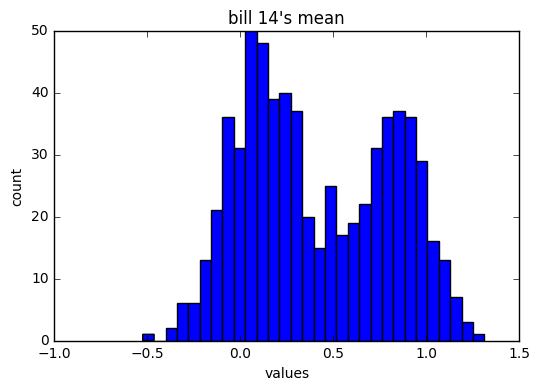

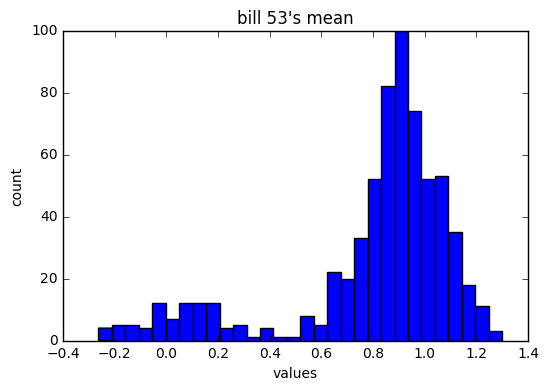

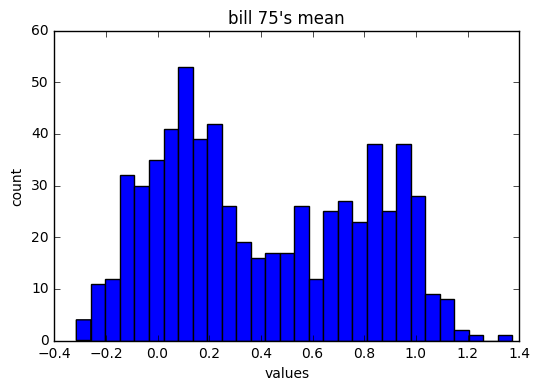

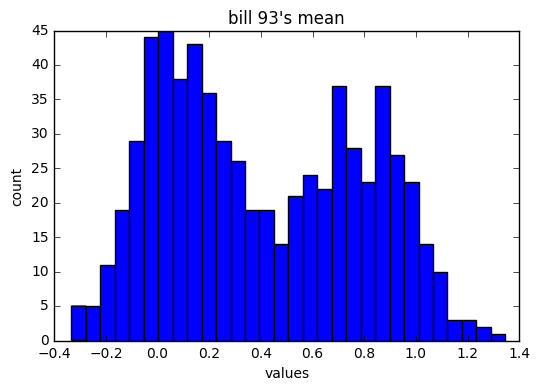

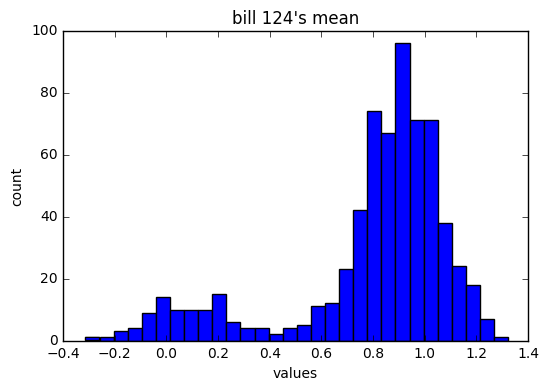

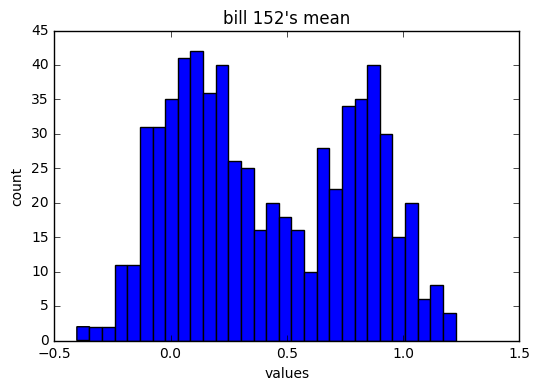

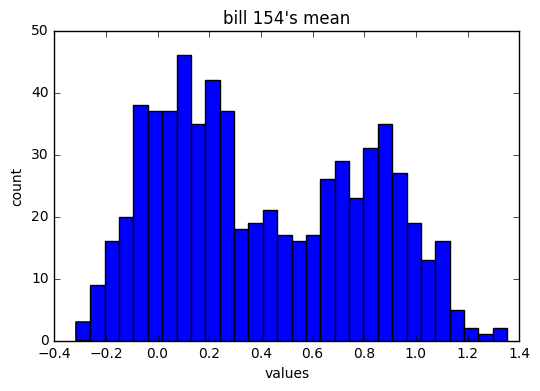

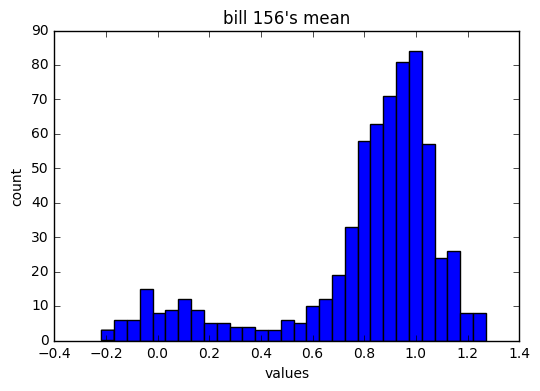

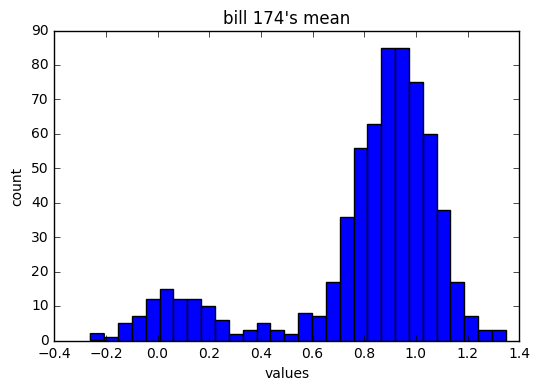

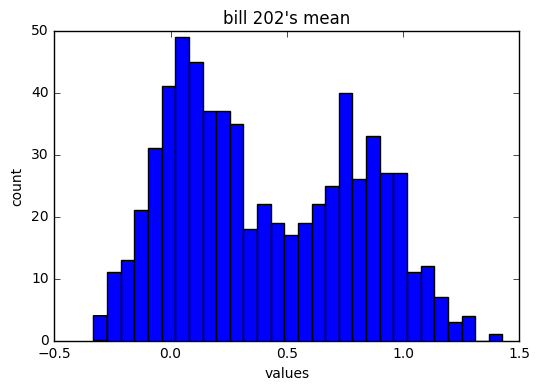

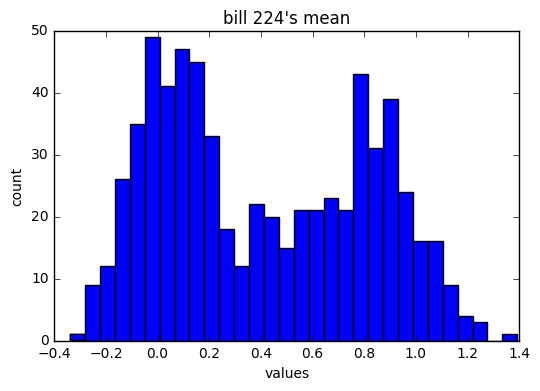

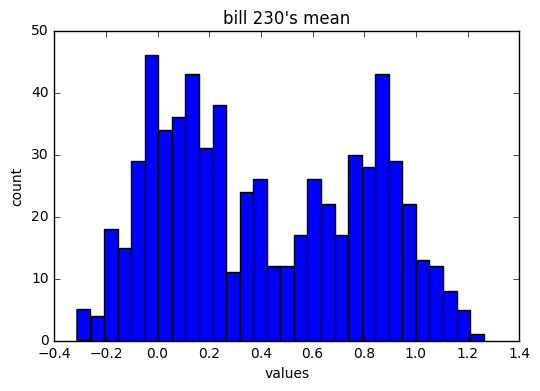

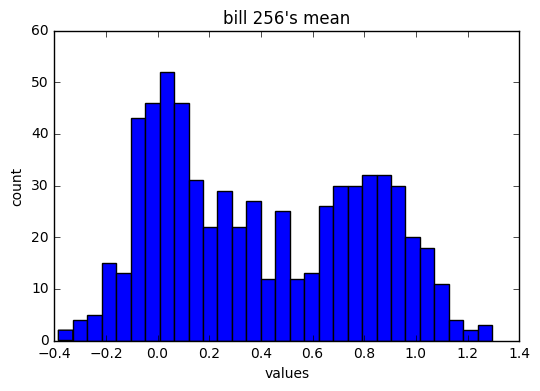

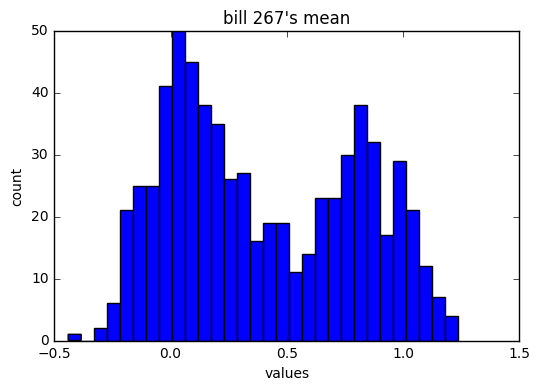

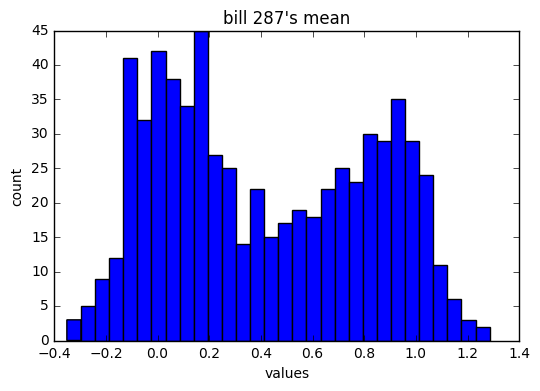

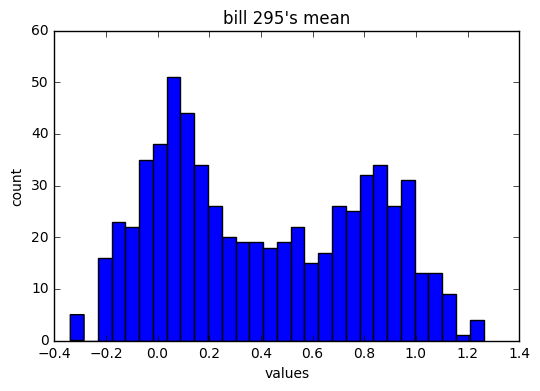

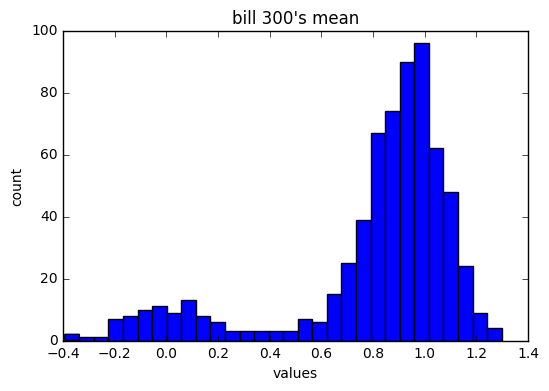

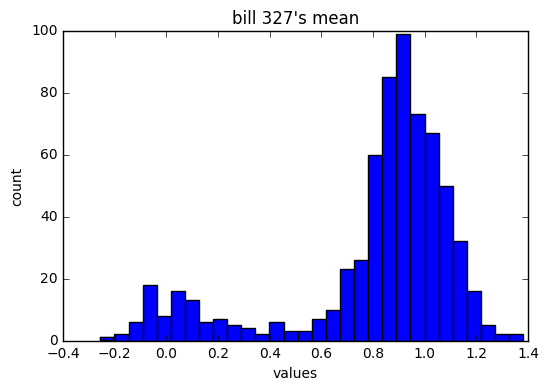

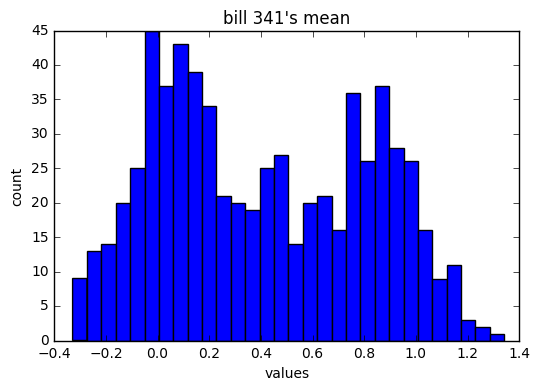

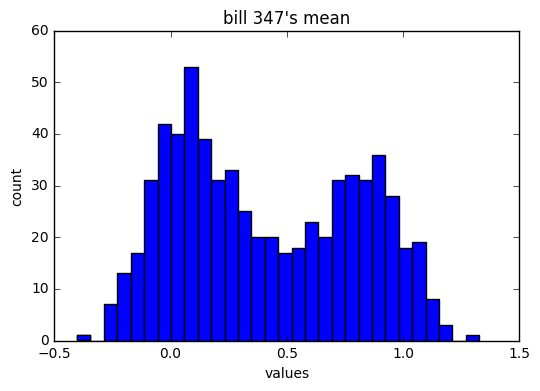

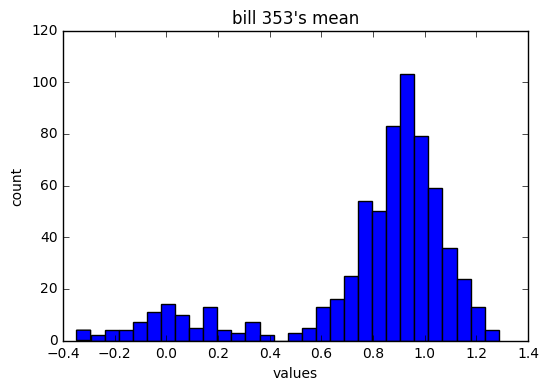

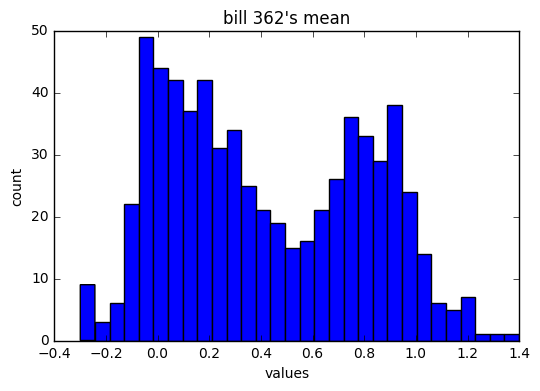

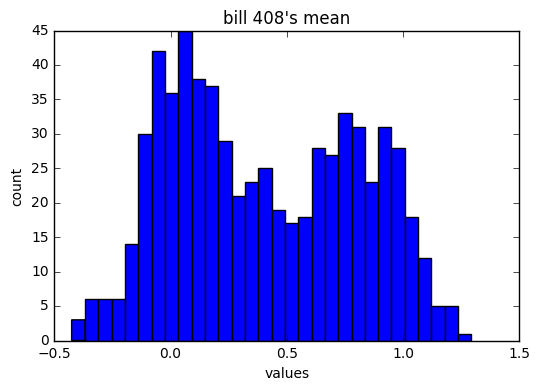

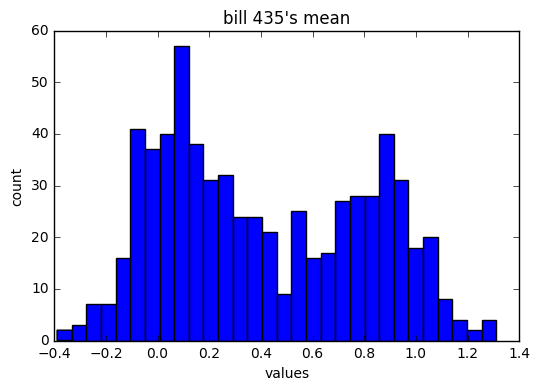

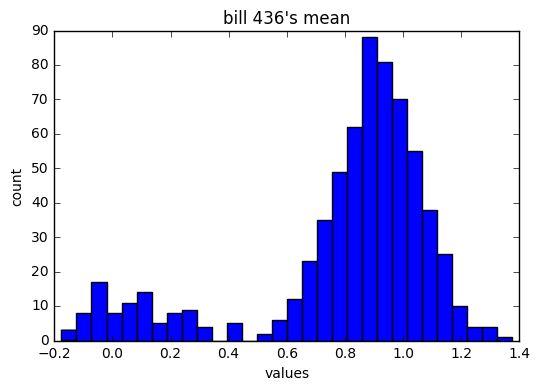

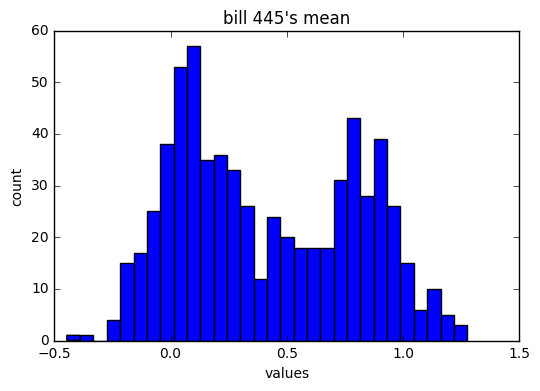

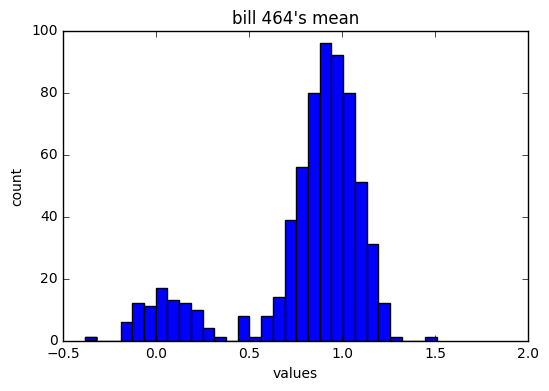

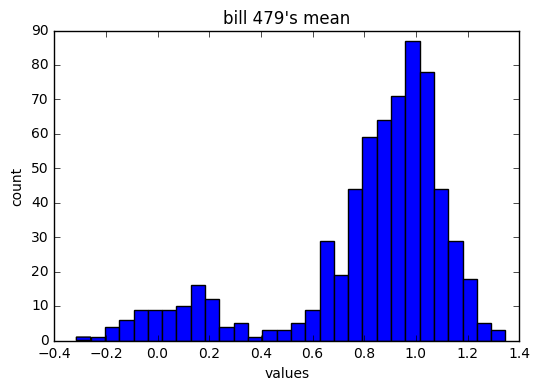

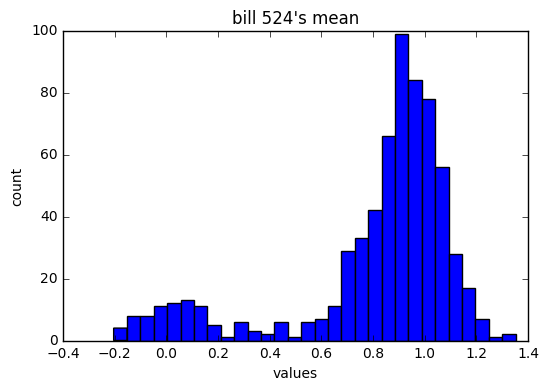

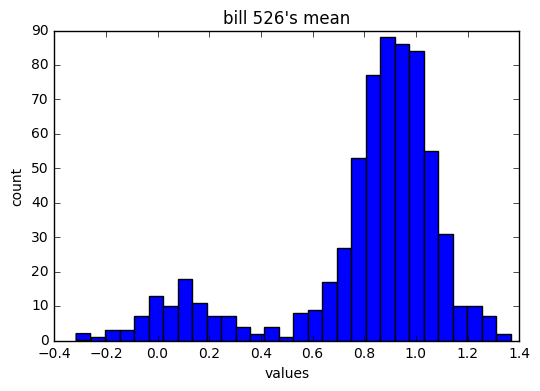

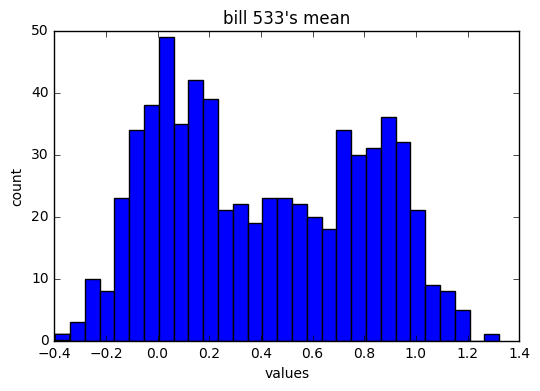

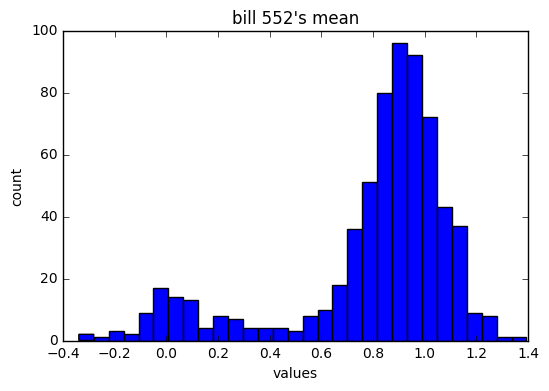

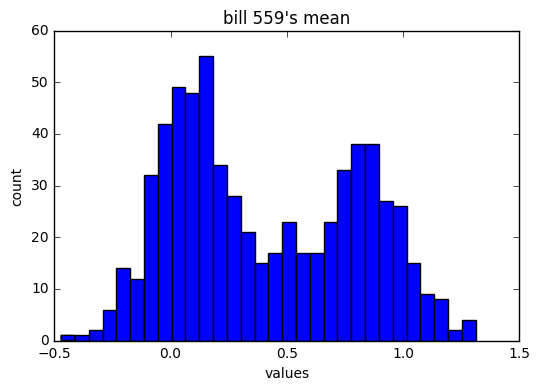

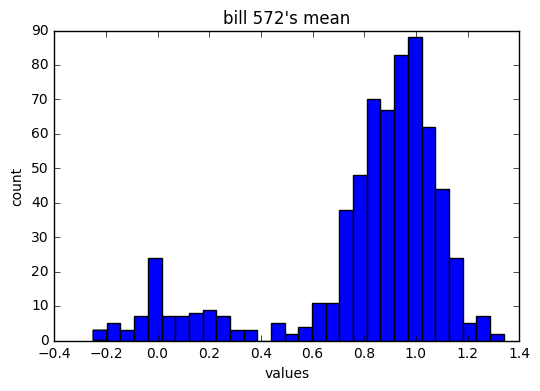

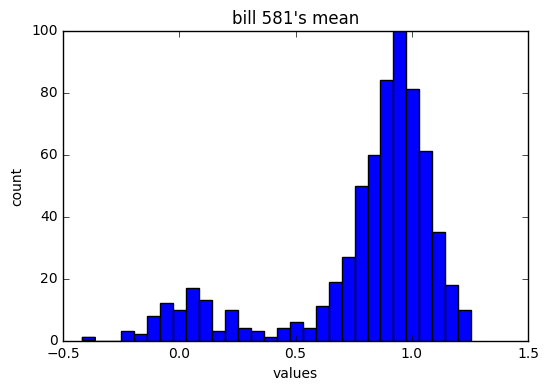

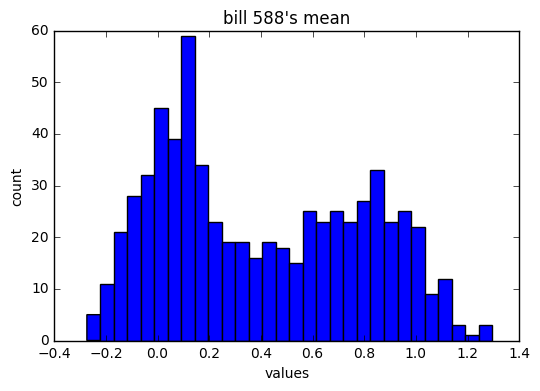

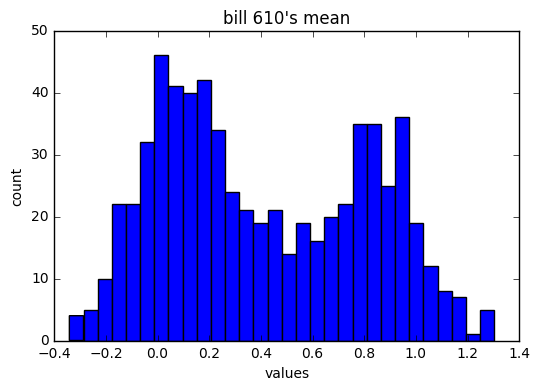

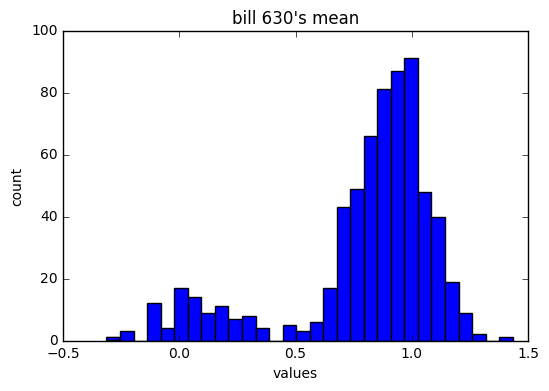

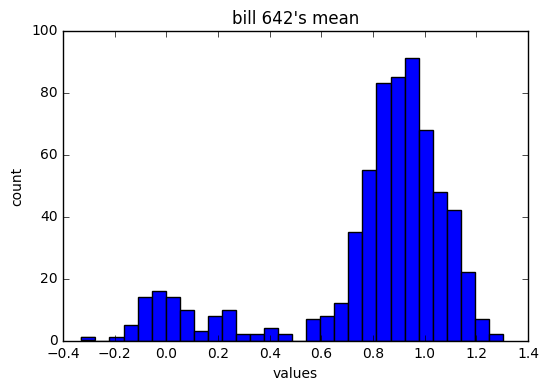

In [665]:
for i in range(n2):
    if st.uniform.rvs()<0.05:
        plt.hist(sampled_params['beta_mean'][i,0,:],bins=30)
        plt.title('bill '+str(i)+"'s mean")
        plt.ylabel('count')
        plt.xlabel('values')
        plt.show()